Test TrainGen functions

In [595]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
% matplotlib inline
%load_ext autoreload
    
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [110]:
data = pd.read_csv('/src/Plasticity_Ker/data/kernel_training_data_auto.csv')

In [546]:
data[data['ptl_idx']==1]

,ptl_idx,pre_spk_num,pre_spk_freq,post_spk_num,post_spk_freq,ptl_occ,ptl_freq,dt1,dt2,dt3,dw_mean,dw_ste
0,1,1,0,1,0,60,1.0,-102.898046,0.0,0,-1.322590,0.0
1,1,1,0,1,0,60,1.0,-75.579896,0.0,0,2.674768,0.0
2,1,1,0,1,0,60,1.0,-80.871473,0.0,0,-12.696449,0.0
3,1,1,0,1,0,60,1.0,-67.562239,0.0,0,0.231446,0.0
4,1,1,0,1,0,60,1.0,-63.553410,0.0,0,-0.990216,0.0
5,1,1,0,1,0,60,1.0,-64.782631,0.0,0,-6.249859,0.0
6,1,1,0,1,0,60,1.0,-43.935576,0.0,0,-12.359642,0.0
7,1,1,0,1,0,60,1.0,-24.243185,0.0,0,-7.943492,0.0
8,1,1,0,1,0,60,1.0,-24.271861,0.0,0,-14.014868,0.0
9,1,1,0,1,0,60,1.0,-15.392028,0.0,0,-3.912158,0.0


In [216]:
data['dt2'].max()

112.3534155

Test PairPtl class.

In [266]:
from modelval.pairptl import PairPtl

Test KernelGen object

In [568]:
from modelval.kernel import KernelGen

In [569]:
ker_test = KernelGen(reso_kernel=2, len_kernel = 101)

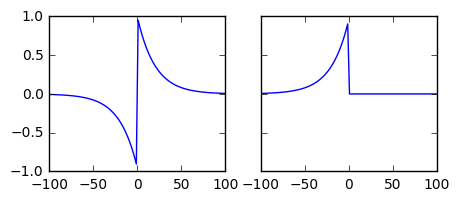

In [173]:
fig, ax = plt.subplots(1,2, sharex=True,sharey=True)
fig.set_figwidth(5)
fig.set_figheight(2)
bi_ker = ker_test.bi_exp_ker(tau_left=20, tau_right=20)
ax[0].plot(ker_test.x, bi_ker)
ax[0].set_xlim(-100, 100)
uni_ker = ker_test.uni_exp_ker(tau=20, side='left')
ax[1].plot(ker_test.x, uni_ker)

Test KernelGen function

In [561]:
from modelval.ArbDataGen import arb_spk_gen

In [562]:
test_ptl = PairPtl(*data.iloc[10])
spk_time_pre, spk_time_post, pre_spk, post_spk = arb_spk_gen(test_ptl, ker_test.reso_kernel, if_noise=1)

Protocol Bi&Poo, 1998, Fig7 (STDP), pre_spk_num=1, post_spk_num=1.00,dt =-17.84


In [563]:
spk_time_pre

array([  405,   905,  1405,  1905,  2405,  2905,  3405,  3905,  4405,
        4905,  5405,  5905,  6405,  6905,  7405,  7905,  8405,  8905,
        9405,  9905, 10405, 10905, 11405, 11905, 12405, 12905, 13405,
       13905, 14405, 14905, 15405, 15905, 16405, 16905, 17405, 17905,
       18405, 18905, 19405, 19905, 20405, 20905, 21405, 21905, 22405,
       22905, 23405, 23905, 24405, 24905, 25405, 25905, 26405, 26905,
       27405, 27905, 28405, 28905, 29405, 29905])

In [564]:
spk_time_post

array([  399,   896,  1401,  1897,  2395,  2896,  3395,  3897,  4397,
        4898,  5398,  5900,  6396,  6896,  7397,  7897,  8393,  8894,
        9394,  9900, 10398, 10897, 11396, 11896, 12398, 12897, 13397,
       13897, 14398, 14899, 15394, 15895, 16395, 16897, 17394, 17897,
       18400, 18897, 19397, 19895, 20397, 20897, 21398, 21900, 22395,
       22895, 23398, 23899, 24397, 24897, 25397, 25894, 26396, 26898,
       27397, 27895, 28397, 28897, 29397, 29897])

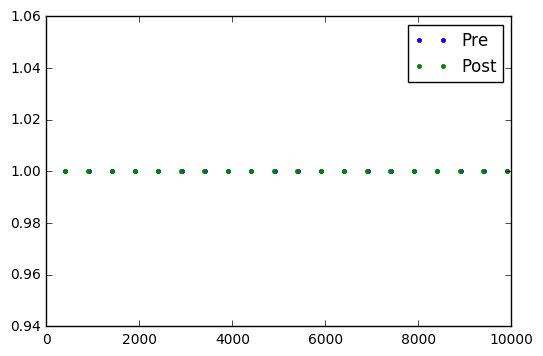

In [565]:
plt.plot(spk_time_pre[:20], np.ones(20), '.', label='Pre')
plt.plot(spk_time_post[:20], np.ones(20), '.', label='Post')
plt.legend()
#plt.axis([0,200,0.9,1.1])

Test network class

In [636]:
from modelval.network import Network

In [637]:
test_net = Network(kernel=ker_test)

In [638]:
y = test_net.build(10,1)

In [639]:
test_X = np.random.normal(size=[1, 10])

In [641]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    w = sess.run(test_net.w)
    a = sess.run(y, feed_dict={test_net.X: test_X})

In [647]:
np.dot(test_X, w)

array([[ 0.68630948]])

In [648]:
a

array([[ 0.6863094]], dtype=float32)